# EPS 109 "Computer Simulations in Earth and Planetary Science"
### Instructor: Burkhard Militzer
### Combined lab and homework assignment 3: part 3


From bCourses, download the files\
'x_positions_2018.txt', \
'x_positions_2019.txt', \
'x_positions_2020.txt', \
'x_positions_2021.txt', \
'x_positions_2022.txt', \
'x_positions_2023.txt', \
'x_positions_2025.txt', \
'submissions_2018.zip', \
'submissions_2019.zip', \
'submissions_2020.zip', \
'submissions_2021.zip', \
'submissions_2022.zip', \
'submissions_2023.zip', \
'submissions_2025.zip'

In this final part, we ask you apply steps from part 2 to results from the others years and compare them. 

(1) In part 2, you generated a ranked magntide plot for this year. Generate such a ranked magnitude plot for every year and then plot all 7 curves into one diagram. Choose a different line styles for all curves, label them and include a legend. 

(2) In part 2, you also calculated the standard deviation between the solution and everyone's guess in this year. This is just one number. Now calculate and print the corresponding numbers for the 6 other years.

Write a discussion of one paragraph or more about the question which class guessed more accurately or more reliably and what may have gone wrong in various years. While one cannot determine this for sure, please come up with your personal hypotheses. Some standard deviations were rather large and exceeded 0.4. What do you think might be the reason?

In [14]:
#Load the usual NumPy and MatPlotLib packages but also 'glob' so that we can read many files more easily.
import matplotlib.pyplot as plt
import numpy as np
import glob
%config InlineBackend.figure_format = 'retina'

f2018 = glob.glob('submissions_2018/*.txt')
f2019 = glob.glob('submissions_2019/*.txt')
f2020 = glob.glob('submissions_2020/*.txt')
f2021 = glob.glob('submissions_2021/*.txt')
f2022 = glob.glob('submissions_2022/*.txt')
f2023 = glob.glob('submissions_2023/*.txt')
f2025 = glob.glob('submissions_2025/*.txt')
s2018 = np.loadtxt('/Users/simoncha/Desktop/school/EPS 109/hw/hw3/x_positions_2018.txt')
s2019 = np.loadtxt('/Users/simoncha/Desktop/school/EPS 109/hw/hw3/x_positions_2019.txt')
s2020 = np.loadtxt('/Users/simoncha/Desktop/school/EPS 109/hw/hw3/x_positions_2020.txt')
s2021 = np.loadtxt('/Users/simoncha/Desktop/school/EPS 109/hw/hw3/x_positions_2021.txt')
s2022 = np.loadtxt('/Users/simoncha/Desktop/school/EPS 109/hw/hw3/x_positions_2022.txt')
s2023 = np.loadtxt('/Users/simoncha/Desktop/school/EPS 109/hw/hw3/x_positions_2023.txt')
s2025 = np.loadtxt('/Users/simoncha/Desktop/school/EPS 109/hw/hw3/x_positions_2025.txt')

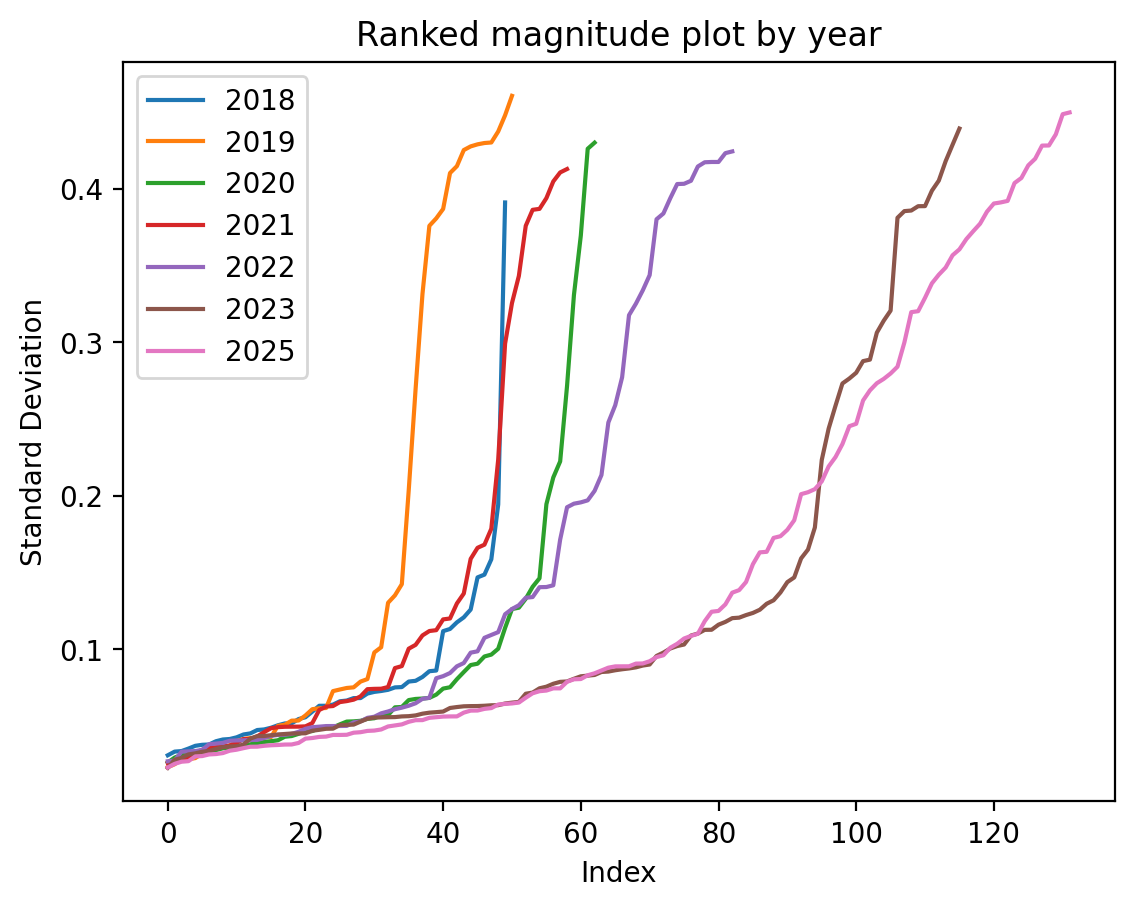

In [15]:
import numpy as np
import matplotlib.pyplot as plt

datasets = {
    "2018": (f2018, s2018),
    "2019": (f2019, s2019),
    "2020": (f2020, s2020),
    "2021": (f2021, s2021),
    "2022": (f2022, s2022),
    "2023": (f2023, s2023),
    "2025": (f2025, s2025)
}

for year, (files, solution) in datasets.items():
    stds = []
    for file in files:
        data = np.loadtxt(file)
        std = np.sqrt(np.sum((solution - data)**2) / (len(data) - 1))
        stds.append(std)

    sorted_std = np.sort(stds)
    plt.plot(sorted_std, label=year)

plt.xlabel("Index")
plt.ylabel("Standard Deviation")
plt.title("Ranked magnitude plot by year")
plt.legend()
plt.show()


Year 2018: sigma = 0.0965
Year 2019: sigma = 0.2280
Year 2020: sigma = 0.1306
Year 2021: sigma = 0.1739
Year 2022: sigma = 0.1962
Year 2023: sigma = 0.1635
Year 2025: sigma = 0.1977


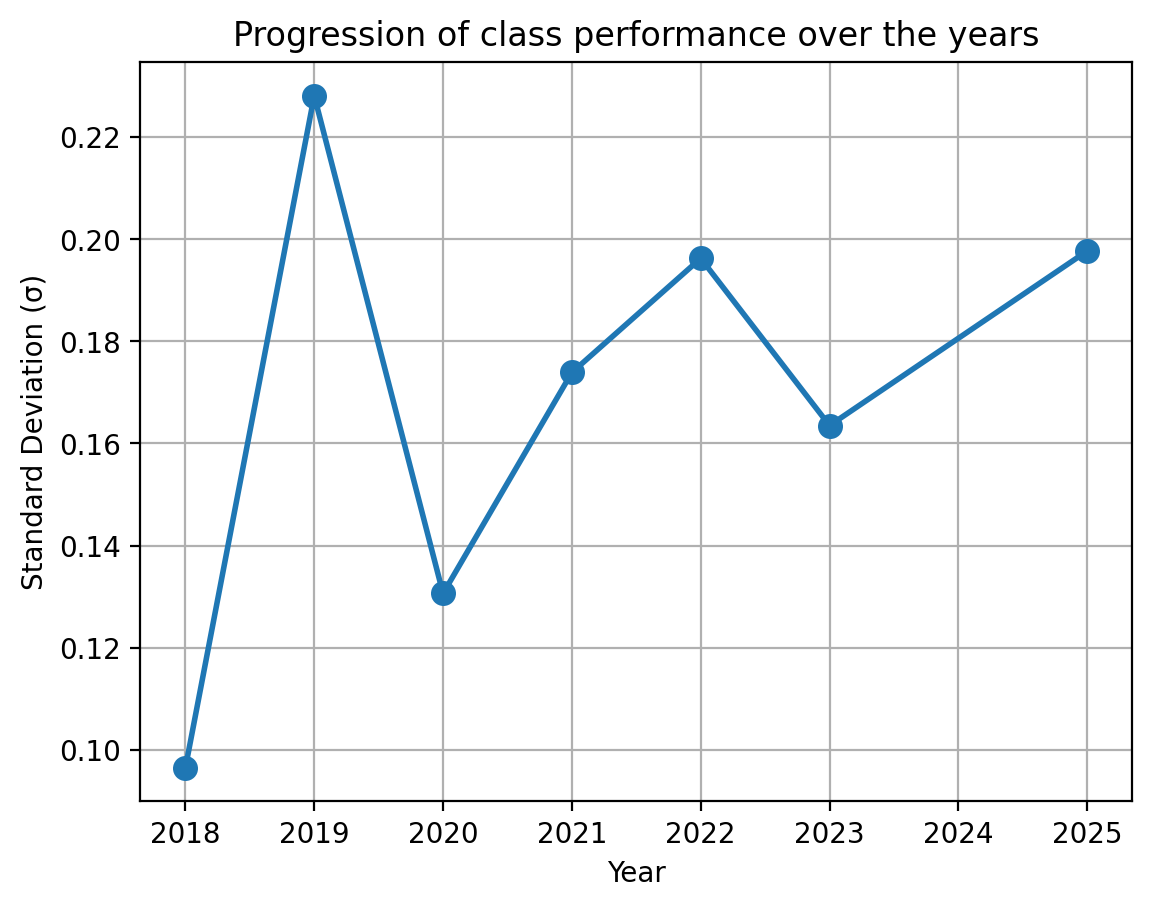

In [16]:
years = []
sigmas = []

for year, (files, solution) in datasets.items():
    diffAll = []
    for file in files:
        data = np.loadtxt(file)
        diff = solution - data
        diffAll.append(diff)
    
    diffAll = np.array(diffAll).T.flatten()
    
    sigma = np.sqrt(np.sum(diffAll**2) / len(diffAll))
    years.append(int(year))
    sigmas.append(sigma)
    
    print(f"Year {year}: sigma = {sigma:.4f}")

plt.plot(years, sigmas, 'o-', linewidth=2, markersize=8)
plt.xlabel("Year")
plt.ylabel("Standard Deviation (σ)")
plt.title("Progression of class performance over the years")
plt.grid(True)
plt.show()

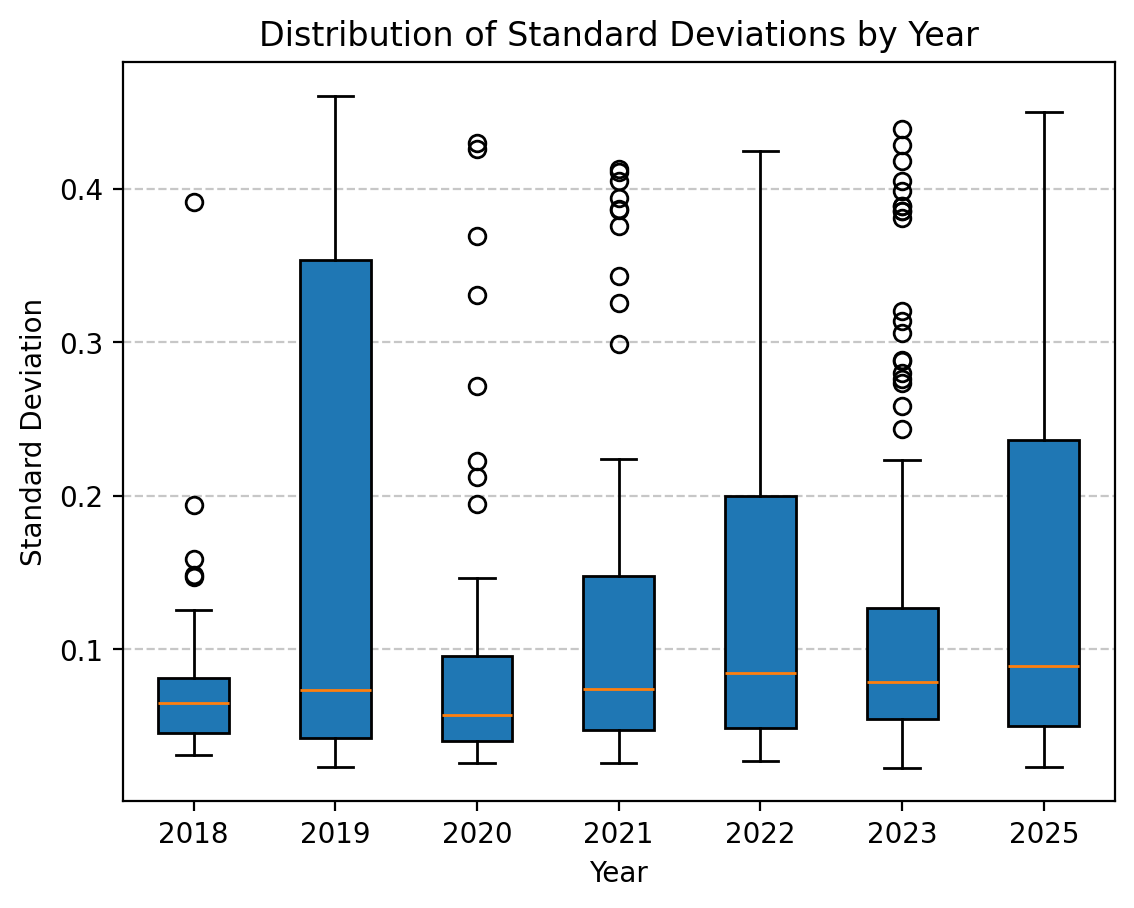

In [17]:
all_stds = []   # list of lists
labels = []     # years for x-axis

for year, (files, solution) in datasets.items():
    stds = []
    for file in files:
        data = np.loadtxt(file)
        std = np.sqrt(np.sum((solution - data)**2) / (len(data) - 1))
        stds.append(std)
    
    all_stds.append(stds)
    labels.append(year)

# Make 7 box plots, one per year
plt.boxplot(all_stds, labels=labels, patch_artist=True)

plt.xlabel("Year")
plt.ylabel("Standard Deviation")
plt.title("Distribution of Standard Deviations by Year")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

I chose to use box plots to evaluate the best performing class because, in my view, “best” shouldn’t be skewed by outliers that inflate the standard deviation. I assume that students putting in their best effort will not stray far from the solution, meaning extreme outliers should not dominate the analysis. Since each year also has a different sample size, the percentile breakdown of a box plot provides a fairer basis for comparison, as it normalizes the distributions. Box plots also make it easier to visually separate outliers. Based on this approach, 2018 and 2020 appear to have the tightest intervals near zero. Between the two, 2018 stands out, with a 75th percentile closer to zero and fewer outliers overall, leading me to conclude that 2018 was the best-performing year.

I think the reason we’re seeing “worse” results over the years is that the number of students has increased. As the class grows, the average level of interest naturally declines, not as a knock on the class, but because the growth of the EPS major and genuine interest in the subject is probably slower than the growth in enrollment. To put it in perspective, the 51 submissions in 2018 likely represented a much higher proportion of students who cared about the class and took the assignment seriously compared to the 132 students in 2025. Those who submitted random or less serious answers likely account for the large standard deviations exceeding 0.4.